In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df_after_wrangle = pd.read_csv('data_after_wrangle.csv')

#### Firstly, lets look at the total success rate of all launch missions

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

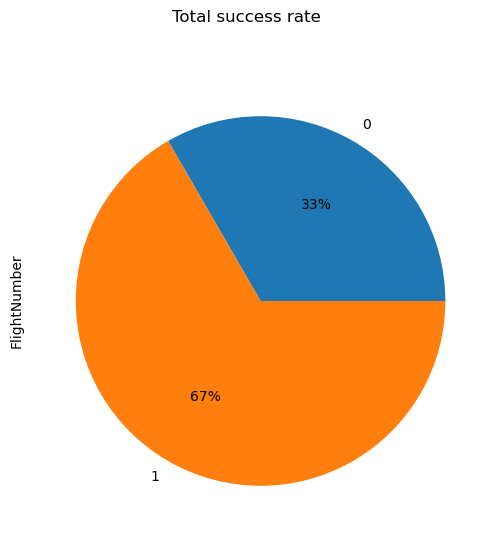

In [107]:
df_after_wrangle.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                                       figsize=(11, 6), autopct='%1.0f%%',
                                                                      title='Total success rate')

#### For those launch mission intend to recycle the first stage rocket booster, a launch pad will be involved <br>
There are two types of launch type: <br>
> ASDS stands for a drone ship on the ocean <br>
> RTLS stands for groud pad

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

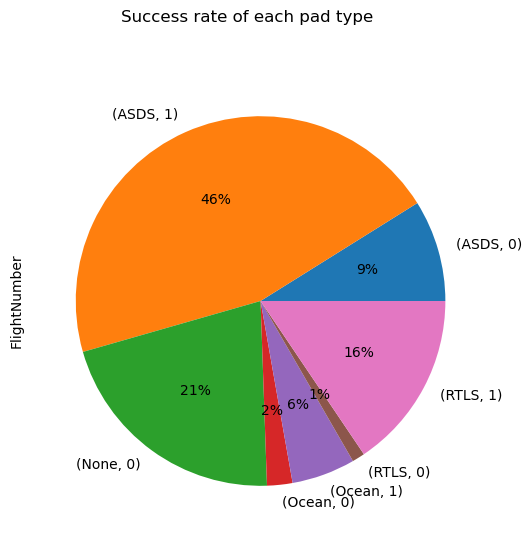

In [108]:
#Explore the success rate of each pad_type
df_after_wrangle.groupby(['pad_type', 'Success'])['FlightNumber'].nunique().plot.pie(subplots=True,
                                                                                        figsize=(11, 6),
                                                                                        autopct='%1.0f%%',
                                                                                        title='Success rate of each pad type')

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

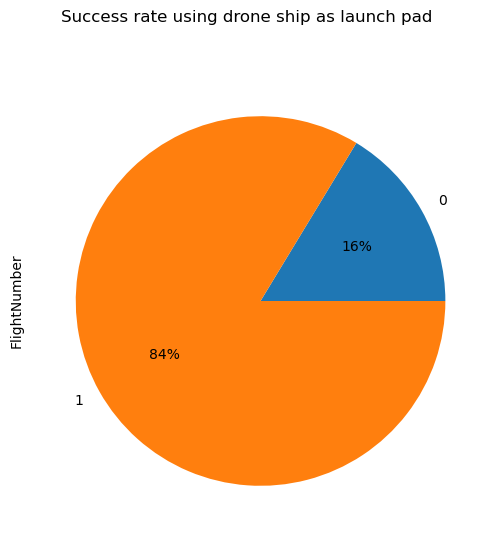

In [109]:
groupby_pad_type = df_after_wrangle.groupby(['pad_type'])
asds = groupby_pad_type.get_group('ASDS')
rtls = groupby_pad_type.get_group('RTLS')
asds.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                           figsize=(11, 6), autopct='%1.0f%%',
                                                          title='Success rate using drone ship as launch pad')

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

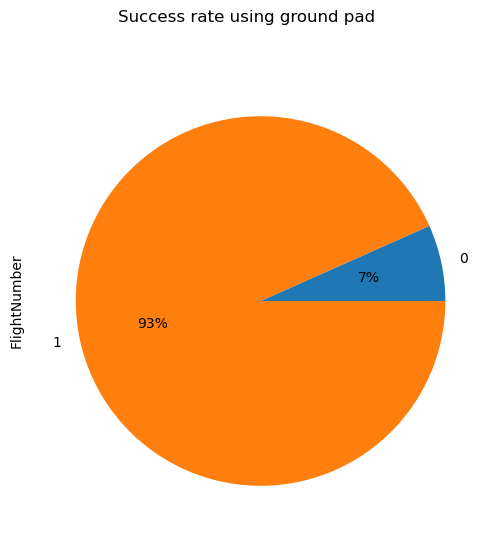

In [110]:
rtls.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, figsize=(11, 6), 
                                                           autopct='%1.0f%%',
                                                          title='Success rate using ground pad')

### exploring orbit types

<AxesSubplot:title={'center':'Number of missions to each orbit'}, xlabel='Orbit'>

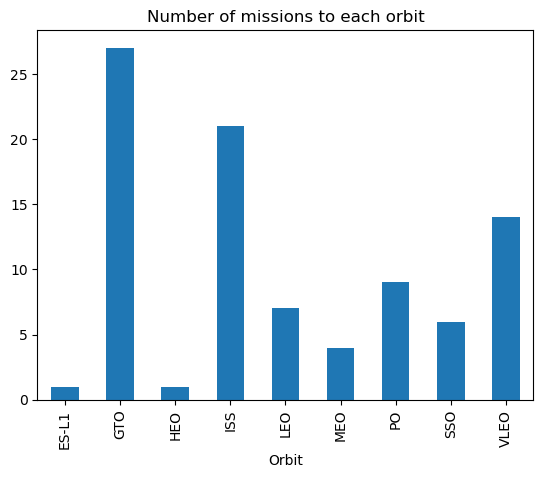

In [111]:
df_after_wrangle.groupby('Orbit')['FlightNumber'].nunique().plot.bar(title='Number of missions to each orbit')

<AxesSubplot:title={'center':'Average pay load mass to each orbit'}, xlabel='Orbit'>

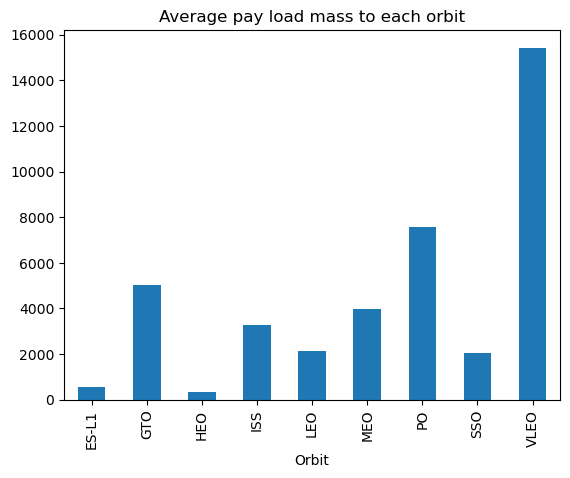

In [112]:
df_after_wrangle.groupby('Orbit')['PayloadMass'].mean().plot.bar(title='Average pay load mass to each orbit')

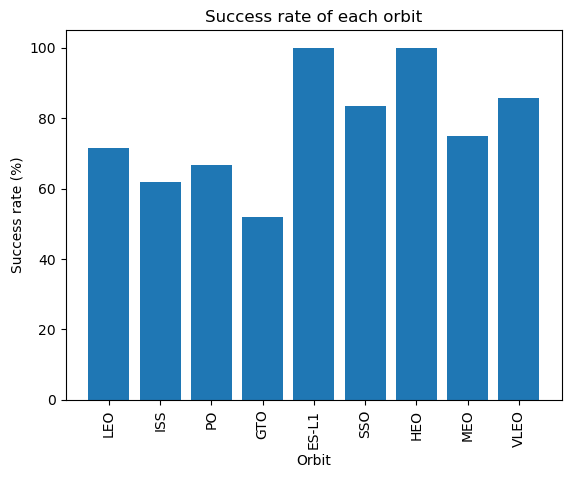

In [113]:
orbit_success_dict = {}
orbit_types = df_after_wrangle['Orbit'].unique()
groupby_orbit = df_after_wrangle.groupby(['Orbit'])
for orbit_type in orbit_types:
    temp = groupby_orbit.get_group(f'{orbit_type}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    orbit_success_dict[f'{orbit_type}'] = temp2[1]
orbit = list(orbit_success_dict.keys())          
success_rate = list(orbit_success_dict.values())  
plt.bar(orbit, success_rate)
plt.xticks(rotation=90)
plt.title('Success rate of each orbit')
plt.xlabel('Orbit')
plt.ylabel('Success rate (%)')
plt.savefig('success_rate_of_each_orbit.png', dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:title={'center':'Target Orbit Frequency'}>

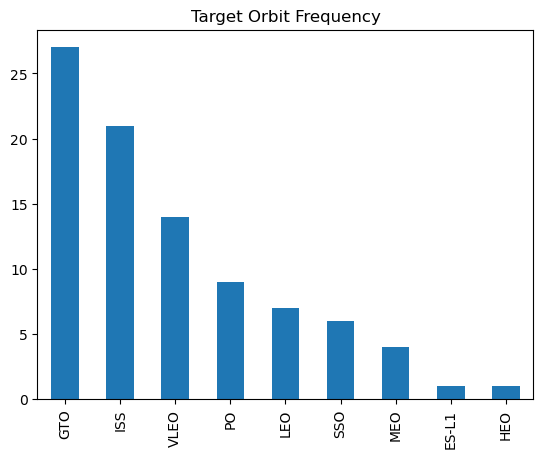

In [114]:
#check the most frequent target orbit
df_after_wrangle['Orbit'].value_counts().plot.bar(title='Target Orbit Frequency')

<AxesSubplot:title={'center':'Target Orbit Frequency for each launch site'}, xlabel='LaunchSite,Orbit'>

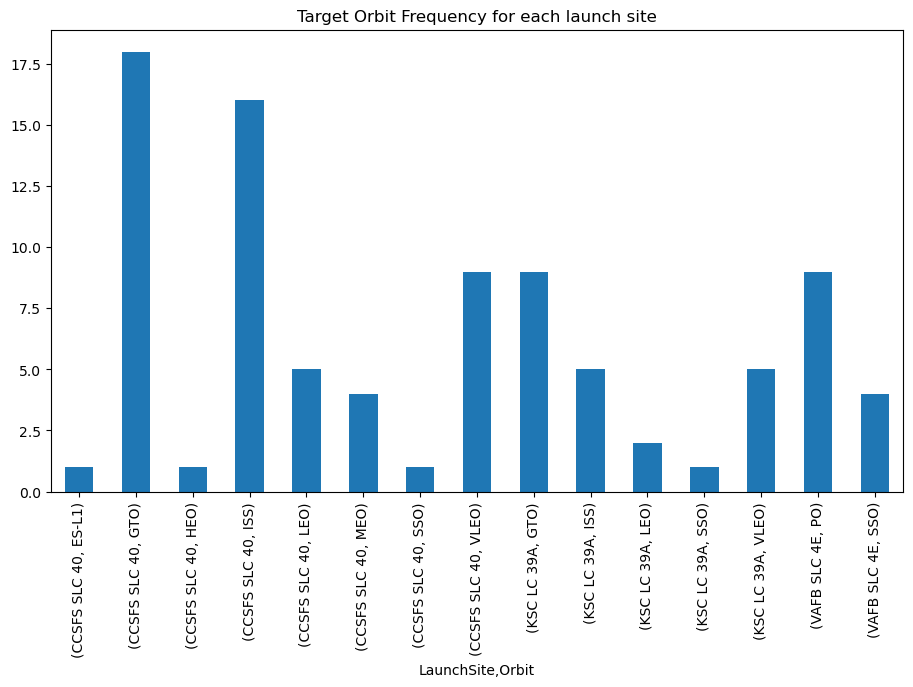

In [115]:
#check the most frequent target orbit for each launch site
df_after_wrangle.groupby(['LaunchSite', 'Orbit'])['FlightNumber'].nunique().plot.bar(figsize=(11, 6), title='Target Orbit Frequency for each launch site')

### exploring the launch site

<AxesSubplot:title={'center':'Average Pay load mass of each launch site'}, xlabel='LaunchSite'>

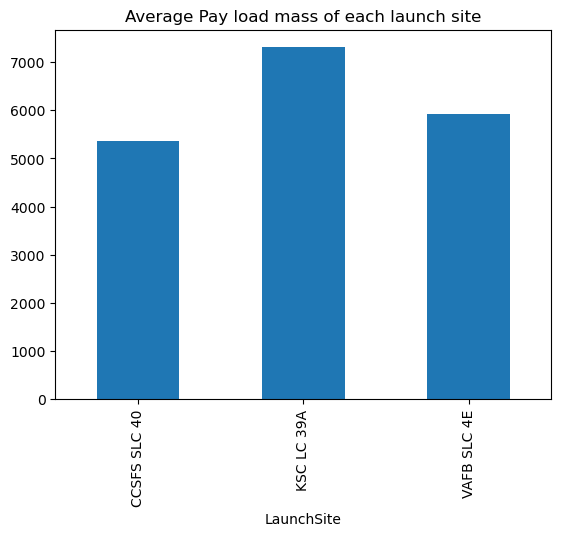

In [116]:
df_after_wrangle.groupby('LaunchSite')['PayloadMass'].mean().plot.bar(title='Average Pay load mass of each launch site')

<AxesSubplot:title={'center':'Number of Missions in different Launch site'}, xlabel='LaunchSite'>

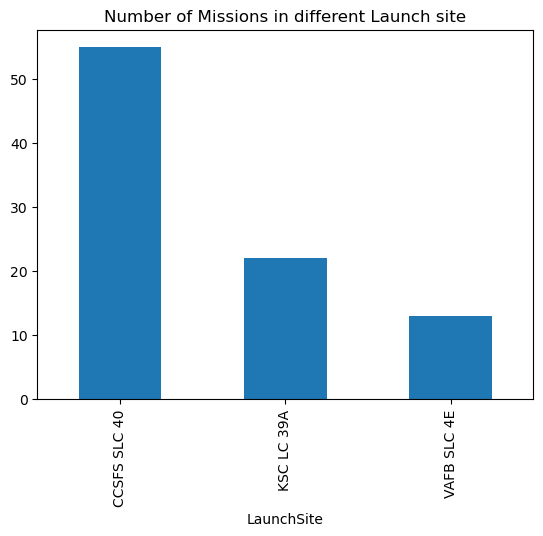

In [117]:
df_after_wrangle.groupby('LaunchSite')['FlightNumber'].count().plot.bar(title='Number of Missions in different Launch site')

<BarContainer object of 3 artists>

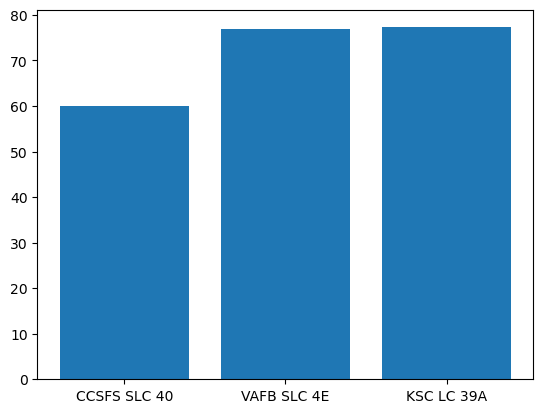

In [118]:
launchsite_success_dict = {}
launchsites = df_after_wrangle['LaunchSite'].unique()
groupby_launchsite = df_after_wrangle.groupby(['LaunchSite'])
for launchsite in launchsites:
    temp = groupby_launchsite.get_group(f'{launchsite}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    launchsite_success_dict[f'{launchsite}'] = temp2[1]
plt.bar(launchsite_success_dict.keys(), launchsite_success_dict.values())

### Exploring if the first stage rocket booster has been reused

In [119]:
#list the Serial number of each booster if it has been reused more than once
groupby_serial = df_after_wrangle.groupby(['Serial'])
serials = df_after_wrangle['Serial'].unique()
serial_reused_dict = {}
for serial in serials:
    temp = groupby_serial.get_group(f'{serial}')
    serial_reused_dict[f'{serial}'] = temp['FlightNumber'].nunique()
serial_reused_dict = {k: v for k, v in sorted(serial_reused_dict.items(), key=lambda item: item[1], reverse=True)}
serial_reused_dict = pd.DataFrame.from_dict(serial_reused_dict, orient='index', columns=['Reused times'])
serial_reused_dict

,Reused times
B1049,6
B1051,5
B1046,4
B1048,4
B1056,4
B1059,4
B1047,3
B1058,3
B1060,3
B1021,2


In [120]:
##list the Serial number of each booster if it has been reused more than once
serial_reused_dict_more_than_once = serial_reused_dict[serial_reused_dict['Reused times'] > 1]
serial_reused_dict_more_than_once


,Reused times
B1049,6
B1051,5
B1046,4
B1048,4
B1056,4
B1059,4
B1047,3
B1058,3
B1060,3
B1021,2


In [121]:
#for all boosters appear second time in the dataset, number of success divided by total number of serial appear second time
serial_reused_dict_more_than_once_success_rate = {}
for serial in serial_reused_dict_more_than_once.index:
    temp = groupby_serial.get_group(f'{serial}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    serial_reused_dict_more_than_once_success_rate[f'{serial}'] = temp2[1]
serial_reused_dict_more_than_once_success_rate = pd.DataFrame.from_dict(serial_reused_dict_more_than_once_success_rate, orient='index', columns=['Success rate (%)'])
serial_reused_dict_more_than_once_success_rate


,Success rate (%)
B1049,100.000000
B1051,100.000000
B1046,75.000000
B1048,75.000000
B1056,75.000000
B1059,100.000000
B1047,66.666667
B1058,100.000000
B1060,100.000000
B1021,100.000000


In [122]:
#check the B1049 booster's first flight
print(df_after_wrangle[df_after_wrangle['Serial'] == 'B1049']['FlightNumber'].min())
#output the date
print(df_after_wrangle[df_after_wrangle['Serial'] == 'B1049']['Date'].min())
#check the B1049 booster's last flight
print(df_after_wrangle[df_after_wrangle['Serial'] == 'B1049']['FlightNumber'].max())
#output the date
print(df_after_wrangle[df_after_wrangle['Serial'] == 'B1049']['Date'].max())

68
2018-09-10
100
2020-08-18


In [123]:
#check the landing outcome of B1049 booster at 2020-08-18
print(df_after_wrangle[(df_after_wrangle['Serial'] == 'B1049') & (df_after_wrangle['Date'] == '2020-08-18')]['Success'].unique())

[1]


In [124]:
groupby_serial = df_after_wrangle.groupby(['Serial'])
df_after_wrangle['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [125]:
df_after_wrangle['Serial'].mode()

0    B1049
Name: Serial, dtype: object

In [126]:
print(f'The B1049 booster has been reused for {len(groupby_serial.get_group("B1049").index)} times')

The B1049 booster has been reused for 6 times


In [127]:
groupby_serial.get_group('B1049')['Orbit'].value_counts()

VLEO    4
GTO     1
PO      1
Name: Orbit, dtype: int64

In [128]:
max_reused = df_after_wrangle['ReusedCount'].max()
core_max_reused = df_after_wrangle.loc[df_after_wrangle['ReusedCount']==max_reused]
core_max_reused['Serial'].unique()

array(['B1051', 'B1058', 'B1060'], dtype=object)

By grouping the dataset with serial number, it is shown that B1049 core had been reused for 6 times, but the data in the column ReusedCount shows that core B1051, B1058 and B1060 had been reused for 12 times. This result suggest that there are several launches not published. 

### Let's explore the affect of the landing pad

<BarContainer object of 5 artists>

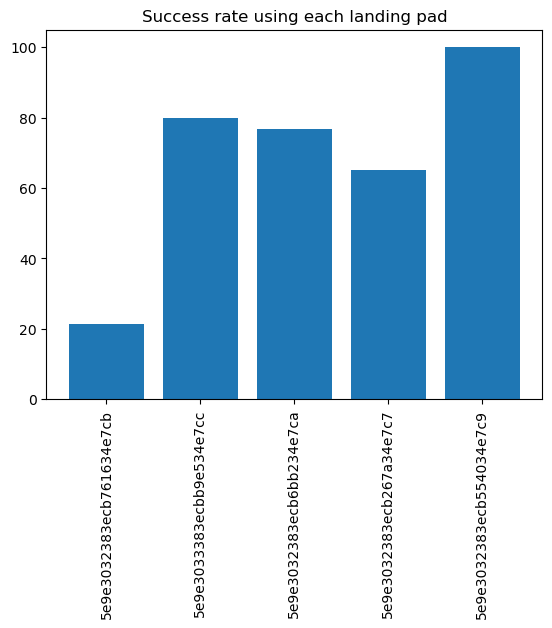

In [129]:
lp_success_dict = {}
lps = df_after_wrangle['LandingPad'].unique()
groupby_lp = df_after_wrangle.groupby(['LandingPad'])
for lp in lps:
    temp = groupby_lp.get_group(f'{lp}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    lp_success_dict[f'{lp}'] = temp2[1]
plt.title('Success rate using each landing pad')
plt.xticks(rotation=90)
plt.bar(lp_success_dict.keys(), lp_success_dict.values())

<BarContainer object of 5 artists>

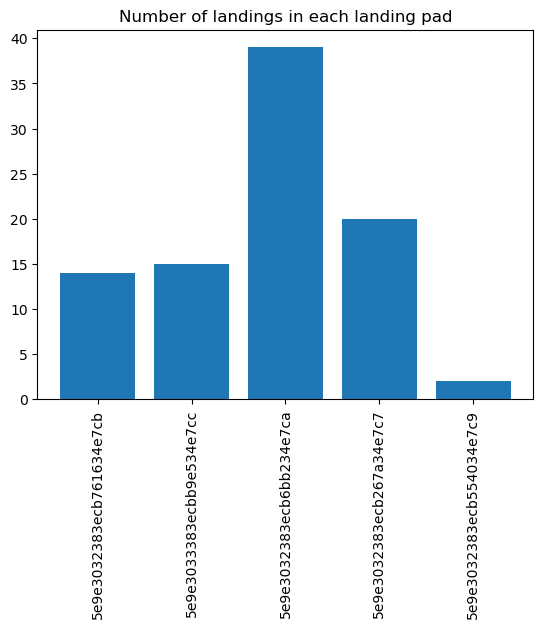

In [130]:
launch_number_dict ={}
for lp in lps:
    temp = groupby_lp.get_group(f'{lp}')
    temp2 = temp['FlightNumber'].count()
    launch_number_dict[f'{lp}'] = temp2
plt.title('Number of landings in each landing pad')
plt.xticks(rotation=90)
plt.bar(launch_number_dict.keys(), launch_number_dict.values())

### Let's look at the success mission yearly trend of launches

In [131]:
df_after_wrangle[['Year', 'Month', 'Day']] = df_after_wrangle['Date'].str.split('-', 2, expand=True)

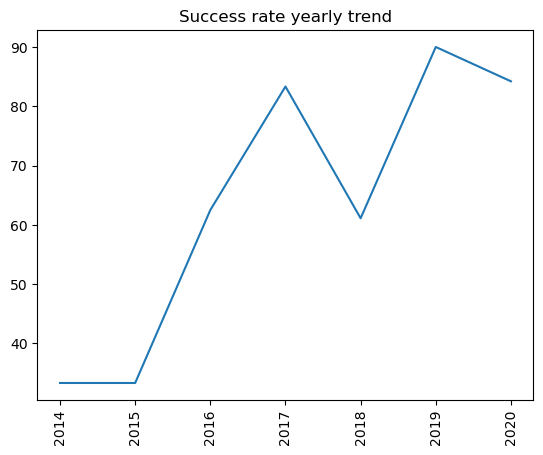

In [132]:
year_success_dict = {}
years = df_after_wrangle['Year'].unique()
groupby_year = df_after_wrangle.groupby(['Year'])
for year in years:
    if int(year) > 2013:
        temp = groupby_year.get_group(f'{year}')
        temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
        year_success_dict[f'{year}'] = temp2[1]
    else:
        pass
plt.xticks(rotation=90)
plt.title('Success rate yearly trend')
plt.plot(year_success_dict.keys(), year_success_dict.values())